## This file aim to analyse the Market Performance in a time range and Time for the Market Recover

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## Merge 000001SS.csv and sse_stocks_historical_data.csv

In [ ]:
# Define the base directory for the stock and companies files
base_dir_stocks = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\03_additional\03_000001.SS_China'

# Define the directory for the earthquake file
base_dir_earthquake = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\02_pre'

In [3]:
# Load datasets with full paths
df_earthquake = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv', parse_dates=['date']) # parse_dates convert the 'date' column from a string(text) format into a datatime format
df_stocks = pd.read_csv(f'{base_dir_stocks}\\sse_stocks_historical_data.csv', parse_dates=['date'])
df_companies = pd.read_csv(f'{base_dir_stocks}\\000001SS.csv')

In [7]:
# Display dataset
print(df_stocks.head())
print('---')
print(df_earthquake.head())
print('---')
print(df_companies.head())


      ticker          industry       date      open     close     volume
0  600000.SS  Banks - Regional 2007-01-04  2.802835  2.778237  223831732
1  600000.SS  Banks - Regional 2007-01-05  2.778236  2.696676  157047235
2  600000.SS  Banks - Regional 2007-01-08  2.692792  2.751050  112110119
3  600000.SS  Banks - Regional 2007-01-09  2.722568  2.950419  144979625
4  600000.SS  Banks - Regional 2007-01-10  2.955598  3.059167  155161423
---
   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth       date                   time  
0    -5.878   34

In [9]:
# Check for missing, duplicate data

# 0. Convert 'Date' column to string to ensure .str accessor works
df_stocks['date'] = df_stocks['date'].astype(str)

# 1. Remove rows where the 'Date' column doesn't match the expected date format
df_stocks = df_stocks[df_stocks['date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# 2. Convert the 'Date' column to datetime
df_stocks['date'] = pd.to_datetime(df_stocks['date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# 3. Check for rows with invalid dates
invalid_dates = df_stocks[df_stocks['date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)


Rows with invalid dates:
Empty DataFrame
Columns: [ticker, industry, date, open, close, volume]
Index: []


In [ ]:
# 4. Check for missing values in each column
missing_values = df_stocks.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
ticker      0
industry    0
date        0
open        0
close       0
volume      0
dtype: int64


In [ ]:
# 5. Check for missing rows (e.g., gaps in the Date column)
full_date_range = pd.date_range(start=df_stocks['date'].min(), end=df_stocks['date'].max(), freq='D')
missing_dates = full_date_range.difference(df_stocks['date'])
print("\nMissing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex(['2007-01-06', '2007-01-07', '2007-01-13', '2007-01-14',
               '2007-01-20', '2007-01-21', '2007-01-27', '2007-01-28',
               '2007-02-03', '2007-02-04',
               ...
               '2025-02-03', '2025-02-04', '2025-02-08', '2025-02-09',
               '2025-02-15', '2025-02-16', '2025-02-22', '2025-02-23',
               '2025-03-01', '2025-03-02'],
              dtype='datetime64[ns]', length=2221, freq=None)


In [ ]:
# 6. Check for duplicate rows
duplicate_rows = df_stocks[df_stocks.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [ticker, industry, date, open, close, volume]
Index: []


In [ ]:
# 7. Check for invalid values (e.g., Volume = 0)
invalid_volume = df_stocks[df_stocks['volume'] == 0]
print("\nRows with Volume = 0:")
print(invalid_volume)


Rows with Volume = 0:
            ticker                   industry       date       open  \
78       600000.SS           Banks - Regional 2007-05-03   3.521343   
79       600000.SS           Banks - Regional 2007-05-04   3.521343   
90       600000.SS           Banks - Regional 2007-05-22   3.566655   
294      600000.SS           Banks - Regional 2008-03-19   4.235331   
460      600000.SS           Banks - Regional 2008-11-20   2.505760   
...            ...                        ...        ...        ...   
2987928  600903.SS  Utilities - Regulated Gas 2018-01-19  18.532827   
2987951  600903.SS  Utilities - Regulated Gas 2018-02-28  17.866978   
2988082  600903.SS  Utilities - Regulated Gas 2018-09-06  12.624863   
2988240  600903.SS  Utilities - Regulated Gas 2019-05-13  12.145964   
2989491  600903.SS  Utilities - Regulated Gas 2024-07-05   6.135916   

             close  volume  
78        3.482505       0  
79        3.482505       0  
90        3.566655       0  
294     

In [ ]:
# Merge df_stocks with df_companies on 'Ticker'
merged_df = pd.merge(
    df_stocks, 
    df_companies, 
    on='ticker', 
    how='left'  # Use 'left' to keep all rows from df_stocks
)

# Reorder the columns
column_order = ['ticker', 'company_name', 'industry', 'date', 'open', 'close', 'volume']
merged_df = merged_df[column_order]

# Convert 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])
    
# Display the resulting DataFrame
print(merged_df.head())

      ticker                                company_name          industry  \
0  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
1  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
2  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
3  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
4  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   

        date      open     close     volume  
0 2007-01-04  2.802835  2.778237  223831732  
1 2007-01-05  2.778236  2.696676  157047235  
2 2007-01-08  2.692792  2.751050  112110119  
3 2007-01-09  2.722568  2.950419  144979625  
4 2007-01-10  2.955598  3.059167  155161423  


In [ ]:
# Save result to new csv file
#merged_df.to_csv(f'{base_dir_stocks}\\clean_china_stocks_data.csv', index=False)

## China (SSE Composite Index 000001.SS) Stock Market Performance

In [ ]:
# Load the datasets

earthquake_data = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv') # magnitude >= 6, 2008-2023
china_stock_data = pd.read_csv(f'{base_dir_stocks}\\clean_china_stocks_data.csv')

print(earthquake_data.head())
print('---')
print(china_stock_data.head())

   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth        date                   time  
0    -5.878   34.0  2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0  2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0  2008-01-05  11:01:06.110000+00:00  
3    51.163   10.0  2008-01-05  11:44:48.170000+00:00  
4    37.216   75.0  2008-01-06  05:14:20.180000+00:00  
---
      ticker                                company_name          industry  \
0  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
1  600000.SS  SHA

In [19]:
# Convert the 'date' column to datetime format and extract the date part.
earthquake_data['date'] = pd.to_datetime(earthquake_data['date']).dt.date
china_stock_data['date'] = pd.to_datetime(china_stock_data['date']).dt.date

In [20]:
# Filter Earthquake Data for China
# Define China's approximate latitude and longitude range
china_lat_range = (18.0, 53.5)     # Latitude range for China (from southern Hainan to northern Heilongjiang)
china_lon_range = (73.5, 135.0)    # Longitude range for China (from western Xinjiang to eastern Heilongjiang)

# Filter earthquakes within China's range
china_earthquakes = earthquake_data[
    (earthquake_data['latitude'].between(*china_lat_range)) &
    (earthquake_data['longitude'].between(*china_lon_range))
]

print("Earthquakes in China area:")
print(china_earthquakes)

Earthquakes in China area:
      tsunami  significance   data_type  magnitude           state  longitude  \
5           0           630  earthquake        6.4  western Xizang    85.1660   
35          0           561  earthquake        6.0     Philippines   121.3340   
43          0           798  earthquake        7.2           China    81.4670   
62          0           559  earthquake        6.0          Taiwan   121.6190   
73          0          1870  earthquake        7.9           China   103.3220   
...       ...           ...         ...        ...             ...        ...   
2069        0           603  earthquake        6.2           Japan   122.4888   
2084        0           565  earthquake        6.0     Philippines   121.3363   
2098        0          1043  earthquake        6.6           China   102.2360   
2104        1           756  earthquake        6.5          Taiwan   121.4138   
2105        1           887  earthquake        6.9          Taiwan   121.3439   



In [21]:
# Count the number of earthquakes
num_earthquakes = china_earthquakes[china_earthquakes['data_type'] == 'earthquake'].shape[0]

# Print the result
print(f"Number of earthquakes: {num_earthquakes}")

Number of earthquakes: 113


In [22]:
# Merge earthquake data with China stock data
merged_data = pd.merge(china_stock_data, china_earthquakes, left_on='date', right_on='date', how='left')

print(merged_data.head())

      ticker                                company_name          industry  \
0  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
1  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
2  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
3  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   
4  600000.SS  SHANGHAI PUDONG DEVELOPMENT BANK CO., LTD.  Banks - Regional   

         date      open     close     volume  tsunami  significance data_type  \
0  2007-01-04  2.802835  2.778237  223831732      NaN           NaN       NaN   
1  2007-01-05  2.778236  2.696676  157047235      NaN           NaN       NaN   
2  2007-01-08  2.692792  2.751050  112110119      NaN           NaN       NaN   
3  2007-01-09  2.722568  2.950419  144979625      NaN           NaN       NaN   
4  2007-01-10  2.955598  3.059167  155161423      NaN           NaN       NaN   

   magnitude state  longitude  latitude  dep

## Impact of Earthquakes on Stock Prices by Industry

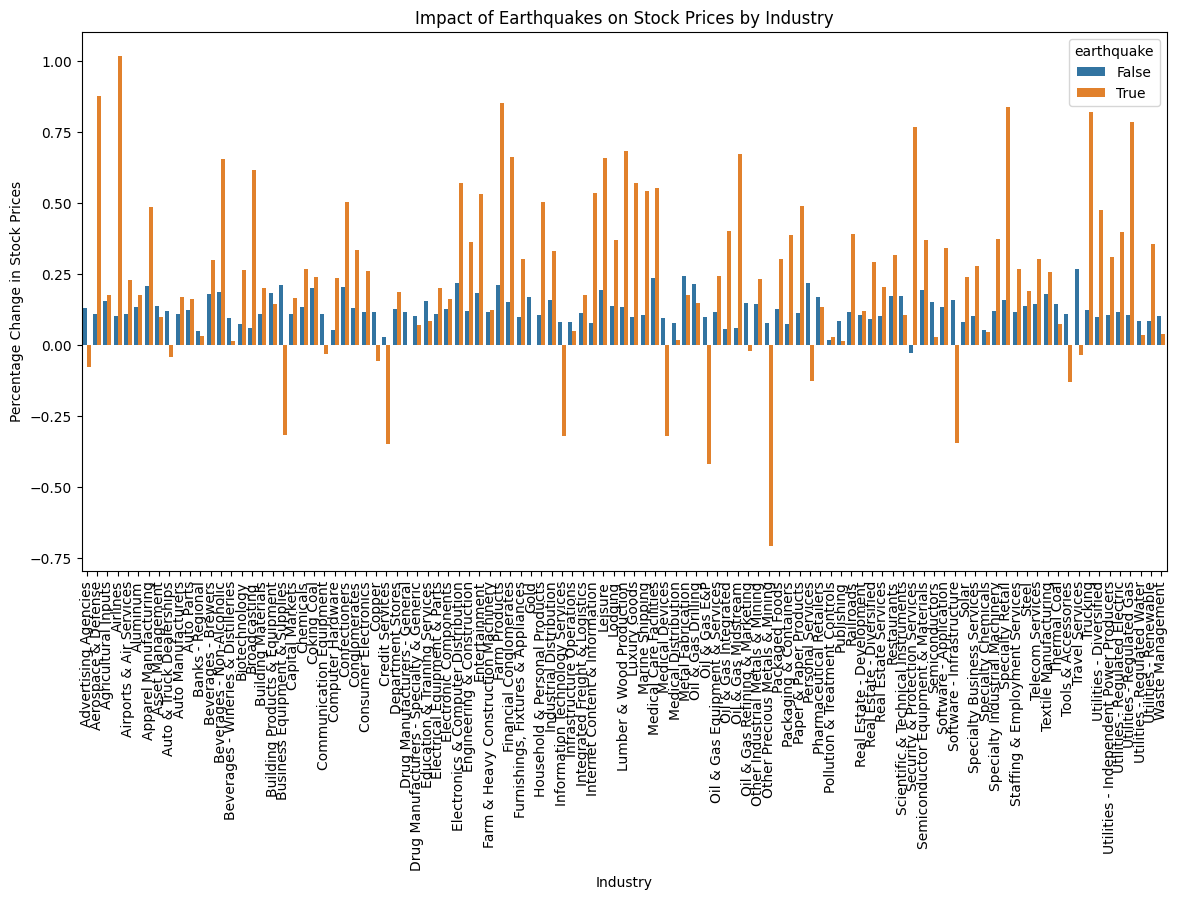

In [29]:
# Industry-wise Analysis
## To analyze the impact on different industries, we can group the data by Industry and perform similar analyses.

# Create a new column to indicate if there was an earthquake on that day
merged_data['earthquake'] = merged_data['magnitude'].notna()

# Group by Industry and earthquake to see the average change in stock prices
industry_impact_on_prices = merged_data.groupby(['industry', 'earthquake']).agg({
    'open': 'mean',
    'close': 'mean'
}).reset_index()

# Calculate the percentage change in stock prices
industry_impact_on_prices['price_change'] = (industry_impact_on_prices['close'] - industry_impact_on_prices['open']) / industry_impact_on_prices['open'] * 100

# Visualize the impact on stock prices by industry
plt.figure(figsize=(14, 7))
sns.barplot(x='industry', y='price_change', hue='earthquake', data=industry_impact_on_prices)
plt.title('Impact of Earthquakes on Stock Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage Change in Stock Prices')
plt.xticks(rotation=90)
plt.show()

## Explain chart: 

### False (average days that there is NO Earthquake), True (average days that there is Earthquake)
### The height of each bar represents the average percentage price change
#### - Negative Impact: If the 'earthquake=True' bar is lower (or negative), earthquakes may correlate with stock declines .
#### - Positive Impact: If the 'earthquake=True' bar is higher, industries might benefit 
#### - No Impact: Bars of similar height suggest earthquakes have no measurable effect.

### => In here, all industries have Negative Impact (True > False)

In [53]:
# Number of Industries Affected
## To determine the number of industries affected by earthquakes, we can count the unique industries in the merged dataset.
unique_industries = merged_data['industry'].nunique()

print(f"Number of unique industries: {unique_industries}")

Number of unique industries: 105


# How Market performs before and after earthquake in the range +-30 days?

In [46]:
# Set parameters
WINDOW_SIZE = 30  # Days before/after earthquake to analyze
BASE_DAYS = 3     # Days before earthquake to use as baseline

# Convert date columns to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])  # merged_data = merge from japan_stock_data and japan_earthquake
earthquake_dates = merged_data[merged_data['earthquake']]['date'].unique()  # Unique dates prevent duplicate processing of same earthquake

In [ ]:
# Create event study dataframe
## For each earthquake, creates a [-30, +30] day window around it.
event_data = []

for eq_date in earthquake_dates:
    start_date = eq_date - pd.Timedelta(days=WINDOW_SIZE)
    end_date = eq_date + pd.Timedelta(days=WINDOW_SIZE)
    
    window_data = merged_data[
        (merged_data['date'] >= start_date) & 
        (merged_data['date'] <= end_date)
    ].copy()
    
    window_data['days_from_event'] = (window_data['date'] - eq_date).dt.days   # days_from_event: to track the number of days relative to the earthquake
    window_data['earthquake_id'] = eq_date   # earthquake_id : to identify the specific earthquake
    event_data.append(window_data)

In [48]:
# Combine all event windows and reset index (prevents index conflicts from different windows)
event_study = pd.concat(event_data).reset_index(drop=True)

# Calculate normalized values
def normalize_group(group):
    # Perform normalization on the non-grouping columns
    baseline_mask = (group['days_from_event'] >= -BASE_DAYS) & (group['days_from_event'] < 0)
    baseline = group.loc[baseline_mask, 'close'].mean()
    
    if pd.notnull(baseline) and baseline != 0:
        group['normalized_close'] = (group['close'] - baseline) / baseline * 100
    else:
        group['normalized_close'] = np.nan
    
    # Return the necessary columns, including grouping columns
    return group[['date', 'close', 'days_from_event', 'normalized_close',
                 'industry', 'ticker', 'earthquake_id']]

In [49]:
# Apply normalization
event_study = (
    event_study.groupby(['industry', 'ticker', 'earthquake_id'], group_keys=False)
              .apply(normalize_group)  # Do not use include_groups=False
              .reset_index(drop=True)
)

C:\Users\dongv\AppData\Local\Temp\ipykernel_21596\2790247188.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(normalize_group)  # Do not use include_groups=False


In [50]:
# Aggregate results
agg_results = event_study.groupby(['industry', 'days_from_event'], as_index=False).agg(
    mean_change=('normalized_close', 'mean'),
    std_change=('normalized_close', 'std'),
    count=('normalized_close', 'count')
)

C:\Users\dongv\AppData\Local\Temp\ipykernel_21596\597599623.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


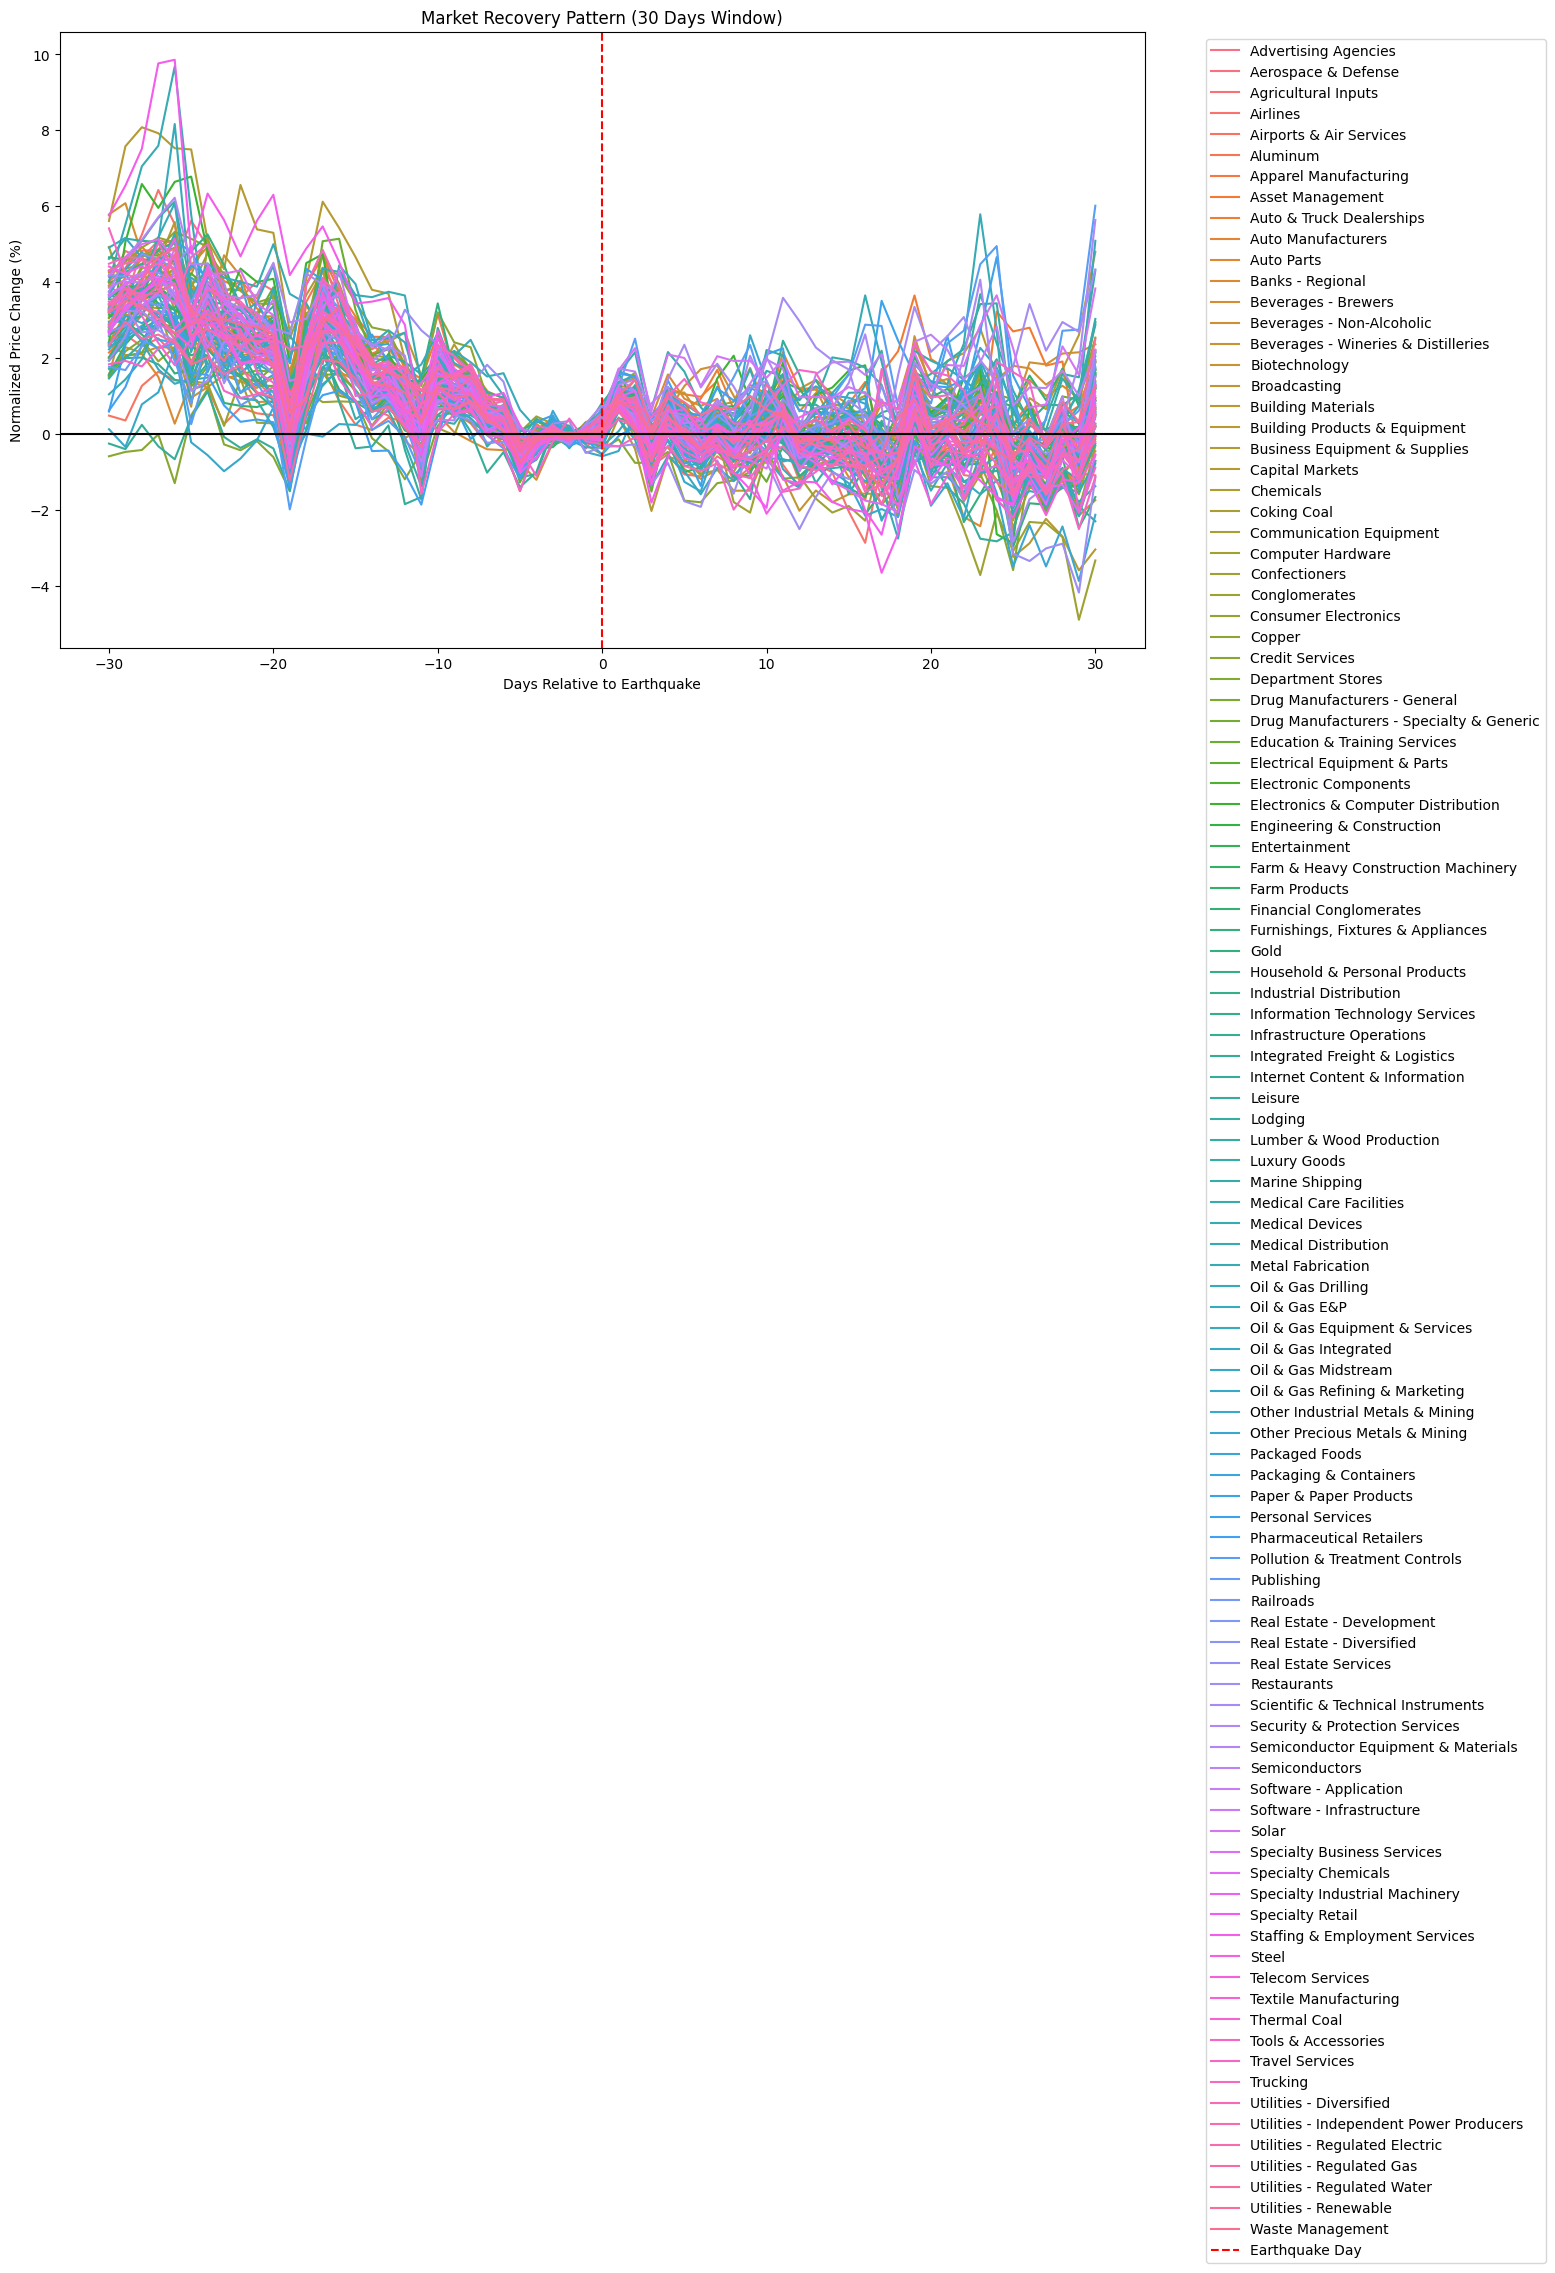

In [51]:
# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=agg_results,
    x='days_from_event',
    y='mean_change',
    hue='industry',
    errorbar=('ci', 95)
)
plt.axvline(0, color='red', linestyle='--', label='Earthquake Day')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Market Recovery Pattern ({WINDOW_SIZE} Days Window)')
plt.xlabel('Days Relative to Earthquake')
plt.ylabel('Normalized Price Change (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Time to recover

In [52]:
# Calculate and sort recovery metrics
recovery_analysis = (
    agg_results[agg_results['days_from_event'] >= 0]
    .groupby('industry')
    .agg(
        max_impact=('mean_change', lambda x: x.min() if x.min() < 0 else x.max()),
        days_to_recover=('mean_change', lambda x: np.argmax(x >= 0) if any(x >= 0) else np.nan),
        volatility=('std_change', 'mean')
    )
    .reset_index()
    .sort_values('max_impact', ascending=True)  # Sort by most negative impact first
)

print("\nRecovery Metrics (Sorted by Maximum Impact):")
print(recovery_analysis.to_string(index=False))


Recovery Metrics (Sorted by Maximum Impact):
                                industry  max_impact  days_to_recover  volatility
                           Confectioners   -4.887376                0   12.034844
                             Restaurants   -4.169699               23   11.968447
          Other Precious Metals & Mining   -3.866744                1   11.731850
          Staffing & Employment Services   -3.650071                0   11.814856
           Business Equipment & Supplies   -3.585759                1   12.963541
                         Credit Services   -3.579393               16    6.822398
                 Financial Conglomerates   -2.962320                0   10.210922
     Electronics & Computer Distribution   -2.872226                0   13.962388
                                Airlines   -2.860929                0    9.849798
          Security & Protection Services   -2.836878                0   13.961234
          Internet Content & Information   -2.821083

## Metric Definitions:
#### - max_impact: The largest percentage drop in stock prices immediately after an earthquake.
#### - days_to_recover: Time (in days) for stock prices to return to pre-earthquake levels.
#### - volatility: Magnitude of price fluctuations during the recovery period (higher = more instability).

## Key Observations
#### Worst Impact:
##### - Confectioners (-4.89%) and Restaurants (-4.17%) suffered the steepest declines.
##### - Solar (+3.84%) was the only sector with a positive return, likely due to post-disaster demand for renewable energy.
#### Recovery Speed:
##### - Most industries recovered immediately (0 days), suggesting markets quickly dismissed earthquake risks.
##### - Restaurants (23 days) and Credit Services (16 days) faced prolonged recovery due to physical damage or consumer behavior shifts.
#### Volatility:
##### - Extreme volatility in Semiconductors (17.0) and Asset Management (16.2) reflects uncertainty in tech/finance sectors.
##### - Even industries with small declines (e.g., Chemicals, Biotech) saw high volatility, indicating broad market instability.

## Critical Trends
#### Immediate Recovery (0 Days):
##### 60% of industries rebounded instantly, implying earthquakes are perceived as short-term shocks. Examples:
##### - Airlines (-2.86%, 0 days): Quick rebound despite operational disruptions (investors bet on pent-up travel demand).
##### - Banks (-2.42%, 0 days): Confidence in central bank stabilization measures.
#### Slow Recovery:
##### - Restaurants (23 days): Physical rebuild time and consumer confidence delays.
##### - Credit Services (16 days): Loan defaults or delayed payments from affected borrowers.
#### Volatility Drivers:
##### - Operational Uncertainty: Sectors like Oil & Gas Drilling (-2.75%, 9.4 volatility) faced risks to infrastructure.
##### - Speculation: Solar’s surge and Semiconductors’ swings reflect bets on post-disaster trends (renewables, tech reliance).


## Suggestion
#### Investors:
##### - Avoid sectors with slow recovery (e.g., Restaurants) post-quake.
##### - Target high-volatility sectors (e.g., Semiconductors) for short-term trades.
##### - Monitor Solar for policy-driven growth.
#### Businesses:
##### - High-Impact Sectors (e.g., Mining, Airlines) should diversify supply chains and disaster-proof operations.

